In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np

# Set the path to your file
path = '/content/drive/MyDrive/preprocessed_images.npy'

# Load the file
images = np.load(path)

# Check the shape of the loaded images
print(f"Loaded {len(images)} images with shape: {images[0].shape}")


Loaded 5154 images with shape: (256, 256)


In [ ]:
# Normalize and reshape to (samples, 256, 256, 1)
images = images.astype('float32') / 255.0
images = np.expand_dims(images, axis=-1)  # Shape: (3607, 256, 256, 1)

# Train-test split (70-30)
x_train, x_test = train_test_split(images, test_size=0.3, random_state=42)
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")

Training set shape: (3607, 256, 256, 1)
Test set shape: (1547, 256, 256, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 64, 64,    │          0 │ conv2d_7[0][0]  

 Total params: 487,137 (1.86 MB)

 Trainable params: 487,137 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 87s 282ms/step - loss: 0.5913 - mse: 0.1783 - val_loss: 0.3960 - val_mse: 0.1088
Epoch 2/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 33s 147ms/step - loss: 0.3319 - mse: 0.0887 - val_loss: 0.1462 - val_mse: 0.0218
Epoch 3/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 43s 157ms/step - loss: 0.1113 - mse: 0.0139 - val_loss: 0.0509 - val_mse: 0.0013
Epoch 4/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 39s 147ms/step - loss: 0.0497 - mse: 0.0015 - val_loss: 0.0388 - val_mse: 4.8117e-04
Epoch 5/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 36s 158ms/step - loss: 0.0386 - mse: 5.7315e-04 - val_loss: 0.0336 - val_mse: 2.7756e-04
Epoch 6/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 35s 156ms/step - loss: 0.0335 - mse: 3.2731e-04 - val_loss: 0.0303 - val_mse: 2.0001e-04
Epoch 7/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 36s 158ms/step - loss: 0.0303 - mse: 2.3662e-04 - val_loss: 0.0277 - val_mse: 1.3635e-04
Epoch 8/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 41s 158ms/step - loss: 0.0275 - mse: 1.5934e-04 - val_loss: 0.0255 - val_mse: 9.4950e

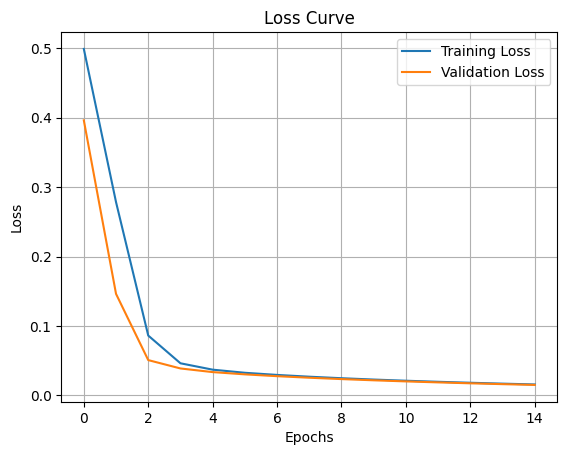

49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step
Test MSE: 0.0000
Test RMSE: 0.0043


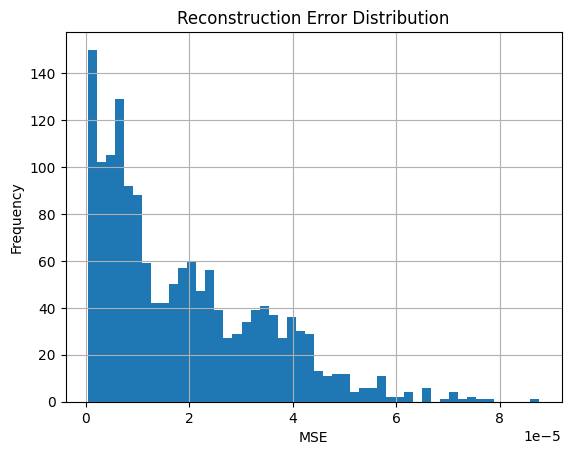

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# U-Net Autoencoder
def unet_autoencoder(input_shape=(256, 256, 1)):
    inputs = layers.Input(shape=input_shape)
    reg = regularizers.l2(1e-4)

    # Encoder
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(inputs)
    c1 = layers.Dropout(0.1)(c1)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(p1)
    c2 = layers.Dropout(0.1)(c2)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(p2)
    c3 = layers.Dropout(0.2)(c3)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(p3)
    c4 = layers.Dropout(0.3)(c4)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(c4)

    # Decoder
    u5 = layers.UpSampling2D((2, 2))(c4)
    u5 = layers.concatenate([u5, c3])
    u5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(u5)
    u5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(u5)

    u6 = layers.UpSampling2D((2, 2))(u5)
    u6 = layers.concatenate([u6, c2])
    u6 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(u6)
    u6 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(u6)

    u7 = layers.UpSampling2D((2, 2))(u6)
    u7 = layers.concatenate([u7, c1])
    u7 = layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(u7)
    u7 = layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=reg)(u7)

    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(u7)

    return models.Model(inputs, decoded)

# Compile model
autoencoder = unet_autoencoder(input_shape=(256, 256, 1))
autoencoder.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['mse'])

# Show model summary
autoencoder.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Data augmentation
augment = False

if augment:
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
    )
    train_gen = datagen.flow(x_train, x_train, batch_size=16)
    history = autoencoder.fit(
        train_gen,
        steps_per_epoch=len(x_train) // 16,
        validation_data=(x_test, x_test),
        epochs=30,
        callbacks=[early_stop]
    )
else:
    history = autoencoder.fit(
        x_train, x_train,
        epochs=15,
        batch_size=16,
        shuffle=True,
        validation_data=(x_test, x_test),
        callbacks=[early_stop]
    )

# Plot loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# MSE & RMSE
mse = mean_squared_error(x_test.flatten(), decoded_imgs.flatten())
rmse = np.sqrt(mse)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

# Optional: Visualize reconstruction error distribution
reconstruction_error = np.mean((x_test - decoded_imgs) ** 2, axis=(1, 2, 3))
plt.hist(reconstruction_error, bins=50)
plt.title("Reconstruction Error Distribution")
plt.xlabel("MSE")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


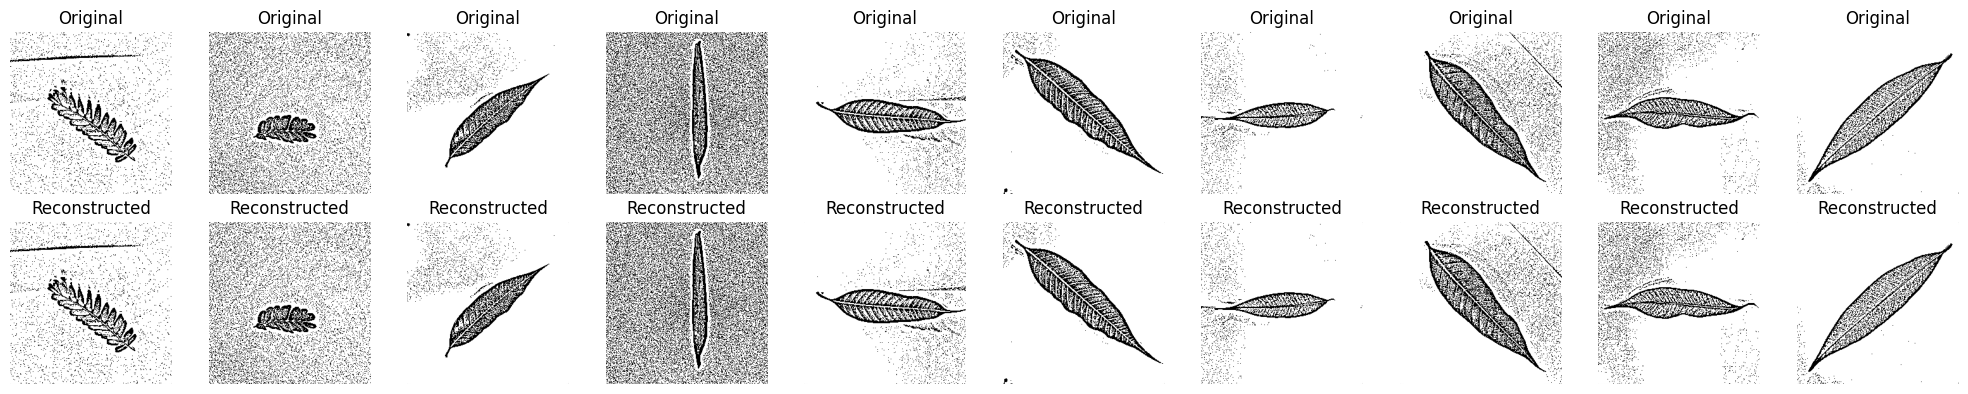

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(256, 256), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
def calculate_reconstruction_accuracy(autoencoder, x_data, factor=1.5):
    reconstructed = autoencoder.predict(x_data)
    errors = np.mean((x_data - reconstructed) ** 2, axis=(1, 2, 3))
    threshold = np.mean(errors) + factor * np.std(errors)
    correct = errors < threshold
    accuracy = np.mean(correct)
    return accuracy, errors, threshold

In [ ]:
# Calculate reconstruction accuracy
accuracy, errors, threshold = calculate_reconstruction_accuracy(autoencoder, x_test, factor=1.5)

# Print the results
print(f"Reconstruction Accuracy: {accuracy * 100:.2f}%")
print(f"Dynamic Threshold (mean + 1.5*std): {threshold:.6f}")
print(f"Mean Error: {np.mean(errors):.6f}")
print(f"Std of Error: {np.std(errors):.6f}")


49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step
Reconstruction Accuracy: 91.47%
Dynamic Threshold (mean + 1.5*std): 0.000042
Mean Error: 0.000019
Std of Error: 0.000016


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Predict reconstructed images from validation data
x_test_pred = autoencoder.predict(x_test)

# Calculate MSE for each image in the validation set
mse_per_image = np.mean((x_test - x_test_pred) ** 2, axis=(1, 2, 3))

# Set a threshold – usually mean + std is a good start
threshold = np.mean(mse_per_image) + np.std(mse_per_image)

# Consider reconstruction "accurate" if MSE is below the threshold
accurate_reconstructions = mse_per_image < threshold

# Calculate validation accuracy
val_accuracy = np.mean(accurate_reconstructions) * 100

print(f"Validation Accuracy (based on reconstruction error): {val_accuracy:.2f}%")

49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step
Validation Accuracy (based on reconstruction error): 81.77%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


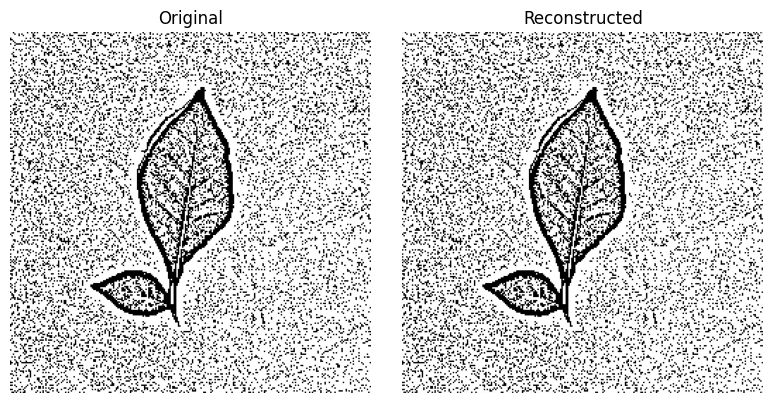

In [ ]:
import matplotlib.pyplot as plt

# Choose any index from test set (e.g., first image)
index = 780

# Predict reconstruction
reconstructed = autoencoder.predict(np.expand_dims(x_test[index], axis=0))

# Plot original vs reconstructed
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(x_test[index].squeeze(), cmap='gray')
plt.title("Original")
plt.axis('off')

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed[0].squeeze(), cmap='gray')
plt.title("Reconstructed")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Save the entire model
autoencoder.save("unet_autoencoder_256x256.h5")